# BUSINESS PROBLEM UNDERSTANDING 

The task is to predict whether the employee will get promoted or not 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.shape

(54808, 14)

# DATA UNDERSTANDING

employee_id              -  unique id for everyone
department               -  Department of employee
region                   -  Region of employment
education                -  Education Level
gender                   -  Gender of Employee
recruitment_channel      -  Channel of recruitment for employee
no_of_trainings          -  no of other trainings completed in previous year on soft skills, technical skills etc.
age                      -  Age of Employee
previous_year_rating     -  Employee Rating for the previous year
length_of_service        -  Length of service in years
KPIs_met >80%            -  if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?              -  if awards won during previous year then 1 else 0
avg_training_score       -  Average score in current training evaluations
is_promoted              -  (Target) Recommended for promotion 

**Data Exploration**

In [5]:
df.shape

(54808, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
# No Duplicate records here 

In [9]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
df["employee_id"].unique()

array([65438, 65141,  7513, ..., 13918, 13614, 51526], dtype=int64)

In [11]:
# Drop this columns because it is a unique columns so no use 

In [12]:
df["department"].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [13]:
df["department"].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [14]:
# No issuse in this 

In [15]:
df["region"].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [16]:
df["region"].value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

In [17]:
# Remove the Region from the prefix,just keep the number as it is and convert to int 

In [18]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [19]:
df["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [20]:
df["education"].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [21]:
df["education"].isnull().sum()

2409

In [22]:
# either drop this missing records or fill the nan values with the mode 

In [23]:
df["gender"].unique()

array(['f', 'm'], dtype=object)

In [24]:
df["gender"].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [25]:
# No issuse in this keep as it is 

In [26]:
df["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [27]:
df["recruitment_channel"].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [28]:
# No issuse in this keep as it is 

In [29]:
df["no_of_trainings"].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [30]:
df["no_of_trainings"].value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

In [31]:
df["no_of_trainings"].isnull().sum()

0

In [32]:
# No issuse in this keep as it is 

In [33]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [34]:
df["age"].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

In [35]:
df["age"].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [36]:
# No issuse in this keep as it is 

In [37]:
df["previous_year_rating"].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [38]:
df["previous_year_rating"].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [39]:
df["previous_year_rating"].isnull().sum()

4124

In [40]:
# Fill the missing values with statistical methods 

In [41]:
df["length_of_service"].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [42]:
df["length_of_service"].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [43]:
# No issuse in this keep as it is 

In [44]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [45]:
df["KPIs_met >80%"].unique()

array([1, 0], dtype=int64)

In [46]:
df["KPIs_met >80%"].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [47]:
df["KPIs_met >80%"].isnull().sum()

0

In [48]:
# No issuse in this keep as it is 

In [49]:
df["awards_won?"].unique()

array([0, 1], dtype=int64)

In [50]:
df["awards_won?"].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

In [51]:
# No issuse in this keep as it is 

In [52]:
df["avg_training_score"].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [53]:
df["avg_training_score"].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [54]:
# No issuse in this keep as it is 

In [55]:
df["is_promoted"].unique()

array([0, 1], dtype=int64)

In [56]:
df["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [57]:
df["is_promoted"].isnull().sum()

0

In [58]:
# No issuse in this keep as it is 

# EDA

In [59]:
continuous = ["age","avg_training_score","length_of_service"]
discrete_counts = ["department","education","gender","recruitment_channel","no_of_trainings","previous_year_rating","KPIs_met >80%","awards_won?","is_promoted"]
discrete_categorical = ["region"]

**continuous**

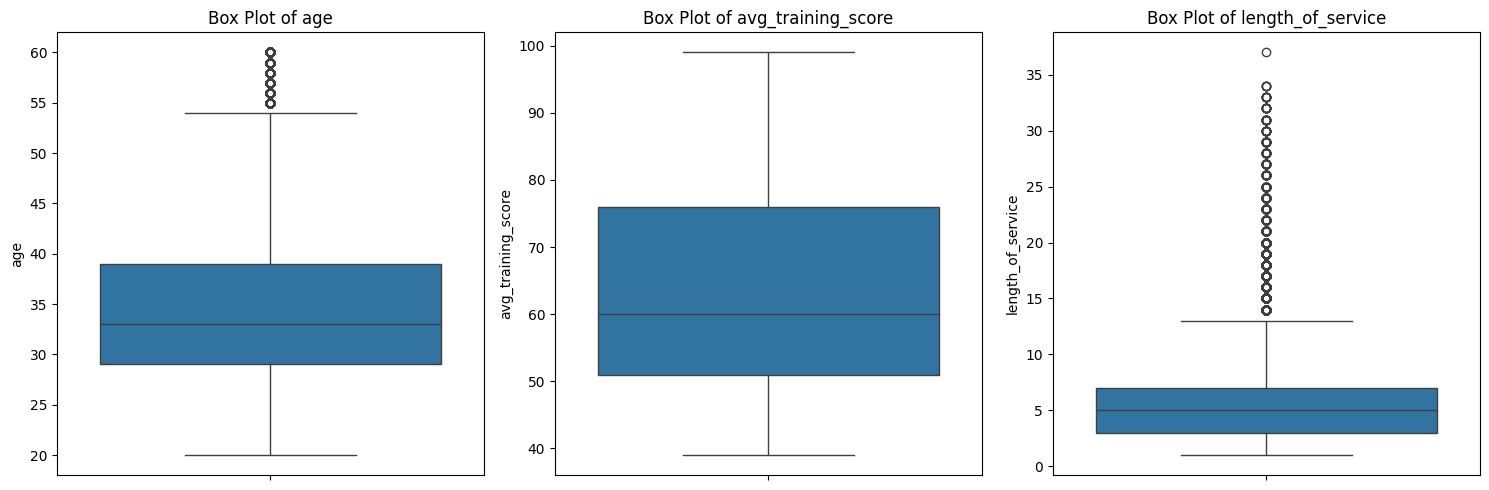

In [60]:
# Set up the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(continuous), figsize=(15, 5))

# Loop through each column and create a boxplot
for i, column in enumerate(continuous):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
df[continuous].describe()

,age,avg_training_score,length_of_service
count,54808.000000,54808.000000,54808.000000
mean,34.803915,63.386750,5.865512
std,7.660169,13.371559,4.265094
min,20.000000,39.000000,1.000000
25%,29.000000,51.000000,3.000000
50%,33.000000,60.000000,5.000000
75%,39.000000,76.000000,7.000000
max,60.000000,99.000000,37.000000


In [62]:
print("skewness_age :",df["age"].skew())
print("skewness_avg_training_score :",df["avg_training_score"].skew())
print("skewness_length_of_service :",df["length_of_service"].skew())

skewness_age : 1.0074317710382241
skewness_avg_training_score : 0.45190808551707995
skewness_length_of_service : 1.738061458740809


In [63]:
# Need to transformation on age and length_of_service columns

**Discrete_count**

In [64]:
df[discrete_counts].describe()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
count,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,3.329256,0.351974,0.023172,0.085170
std,0.609264,1.259993,0.477590,0.150450,0.279137
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,0.000000,0.000000
max,10.000000,5.000000,1.000000,1.000000,1.000000


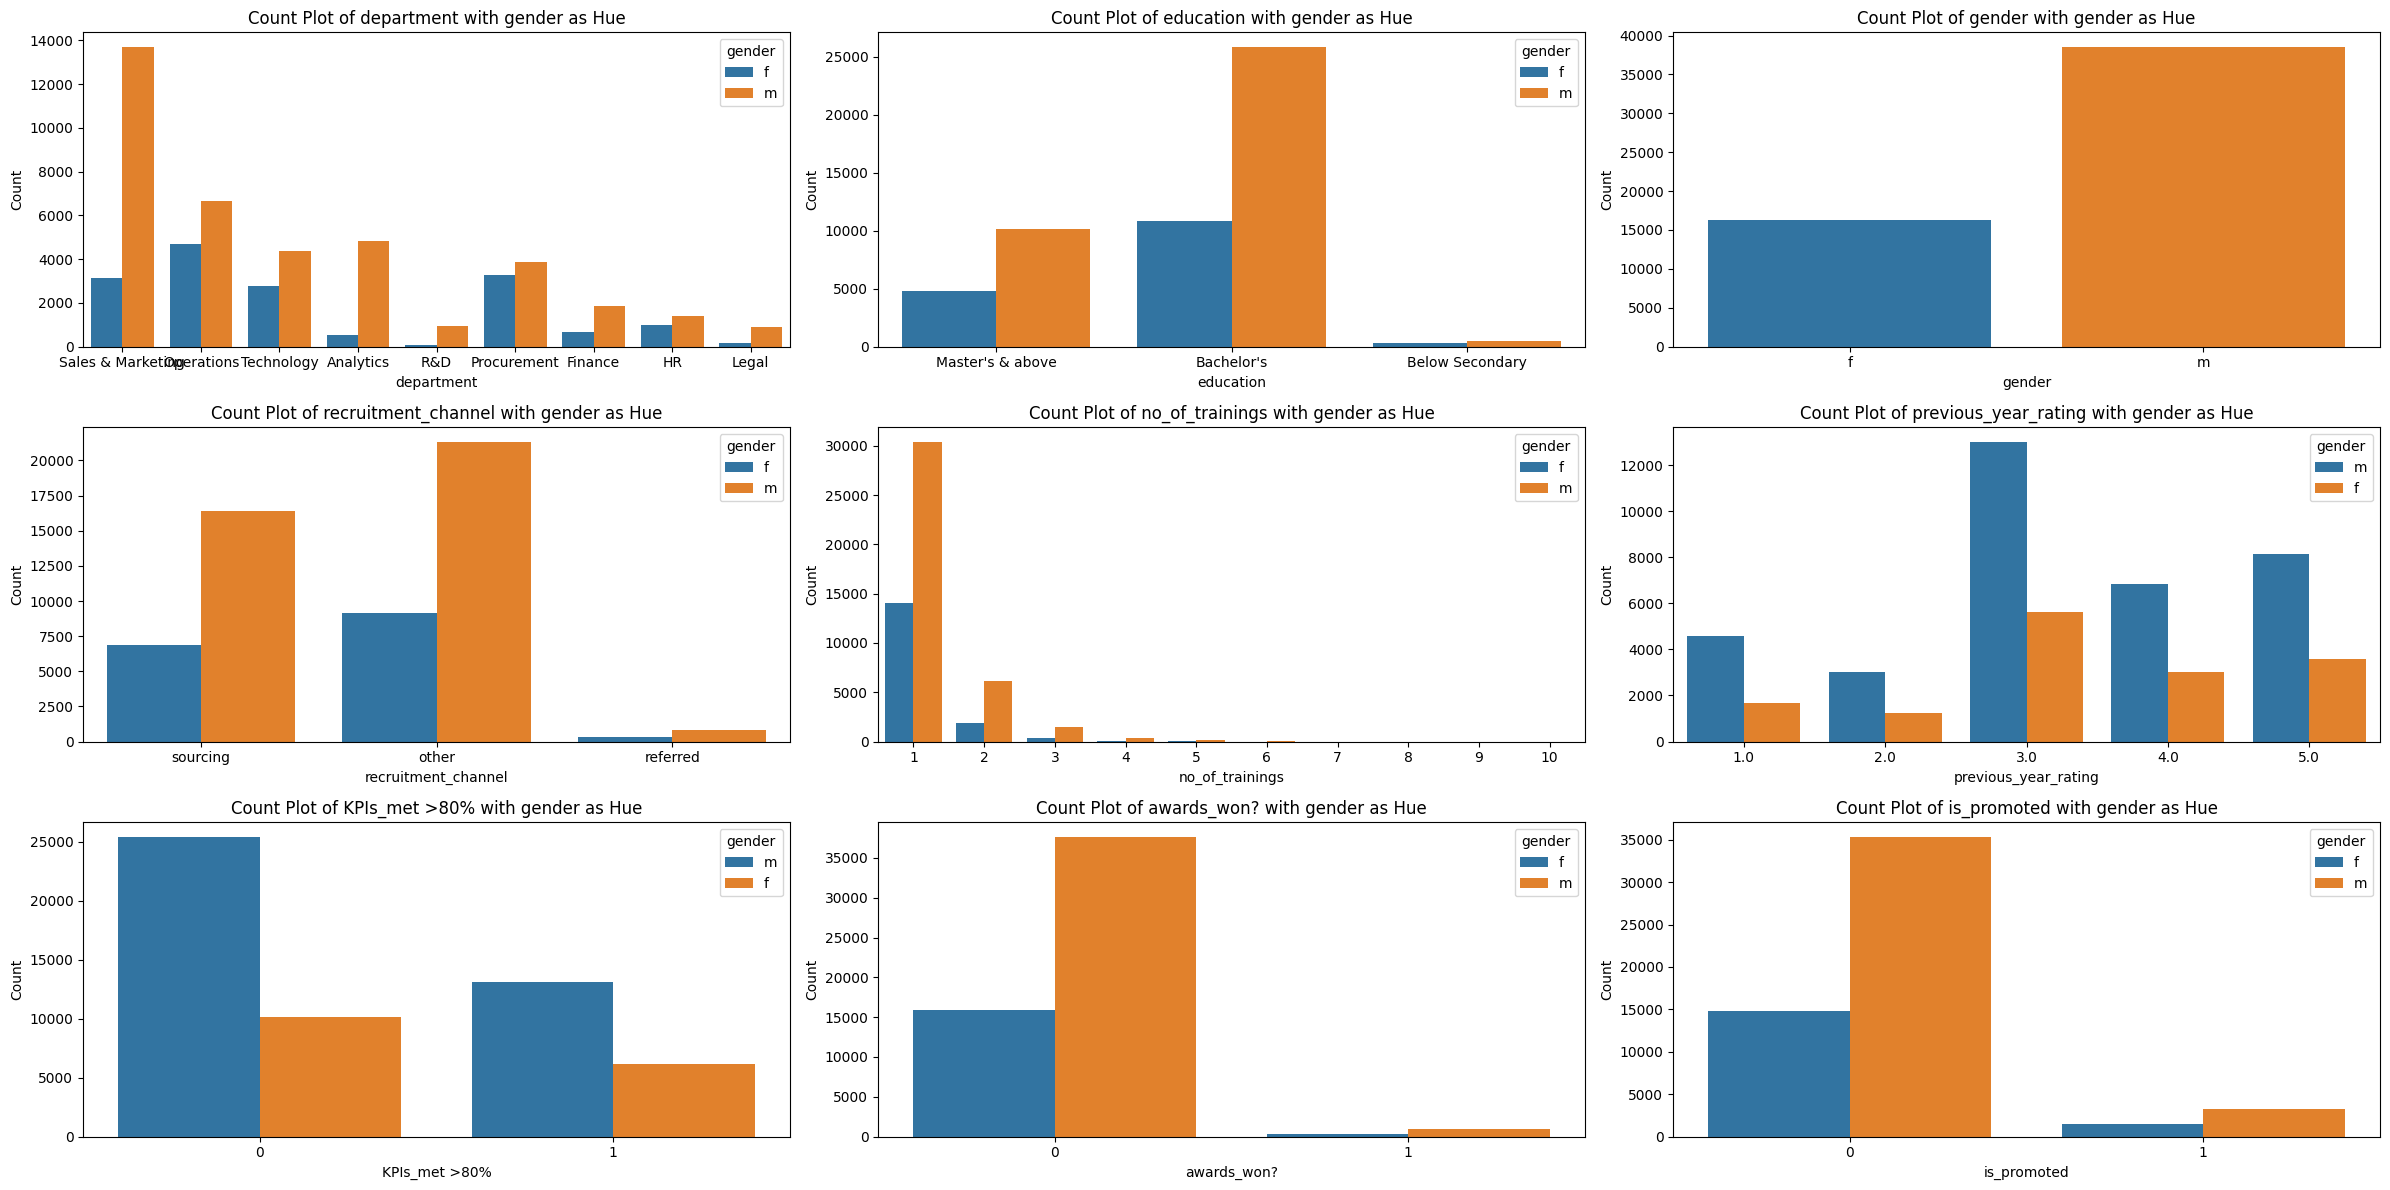

In [65]:
# Set up the subplot grid
n_cols = 3  # Number of columns per row
n_rows = (len(discrete_counts) + n_cols - 1) // n_cols  # Number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, n_rows * 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Choose a hue column (e.g., "gender")
hue_column = "gender"

# Loop through each column and create a count plot with hue
for i, column in enumerate(discrete_counts):
    sns.countplot(data=df, x=column, hue=hue_column, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} with {hue_column} as Hue')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [66]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [67]:
df.drop(columns="employee_id",inplace=True)

In [68]:
# Removed the prefix from this kept only the suffix
df["region"] = df["region"].str.replace("region_", "", regex=False)


In [69]:
# filled the nan values using the statisctical method
df["education"].fillna(df["education"].mode()[0],inplace=True)

In [70]:
## filled the nan values using the statisctical method
df["previous_year_rating"].fillna(df["previous_year_rating"].mean(),inplace=True)

In [71]:
# changed the data type of region
df["region"] = df["region"].astype("int")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  int32  
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 5.2+ MB


# ENCODING

In [73]:
# used label encoding for the columns 
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
label_encoding = ["department", "education", "recruitment_channel"]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in label_encoding:
    df[col] = le.fit_transform(df[col])

# Check the result
print(df[label_encoding].head())

   department  education  recruitment_channel
0           7          2                    2
1           4          0                    0
2           7          0                    2
3           7          0                    0
4           8          0                    0


In [74]:
df["gender"] = df["gender"].replace({"f":0,"m":1})

In [75]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,22,0,1,0,1,30,5.0,4,0,0,60,0
2,7,19,0,1,2,1,34,3.0,7,0,0,50,0
3,7,23,0,1,0,2,39,1.0,10,0,0,50,0
4,8,26,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,14,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,27,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,1,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,9,0,1,2,1,29,1.0,2,0,0,45,0


In [77]:
# done scalling for the coulmns
from sklearn.preprocessing import StandardScaler

# List of columns to scale
scaling = ["department", "region", "no_of_trainings", "avg_training_score"]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the specified columns
df[scaling] = scaler.fit_transform(df[scaling])

# Check the result
print(df[scaling].head())

   department    region  no_of_trainings  avg_training_score
0    0.808933 -0.713357        -0.415276           -1.075931
1   -0.388183  0.773827        -0.415276           -0.253282
2    0.808933  0.476390        -0.415276           -1.001145
3    0.808933  0.872972         1.226063           -1.001145
4    1.207972  1.170409        -0.415276            0.718939


In [78]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,-0.713357,2,0,2,-0.415276,35,5.0,8,1,0,-1.075931,0
1,-0.388183,0.773827,0,1,0,-0.415276,30,5.0,4,0,0,-0.253282,0
2,0.808933,0.476390,0,1,2,-0.415276,34,3.0,7,0,0,-1.001145,0
3,0.808933,0.872972,0,1,0,1.226063,39,1.0,10,0,0,-1.001145,0
4,1.207972,1.170409,0,1,0,-0.415276,45,3.0,2,0,0,0.718939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.207972,-0.019338,0,1,2,-0.415276,48,3.0,17,0,0,1.092871,0
54804,-0.388183,1.269554,2,0,0,-0.415276,37,2.0,6,0,0,-0.552428,0
54805,-1.984338,-1.308230,0,1,0,-0.415276,27,5.0,3,1,0,1.167657,0
54806,0.808933,-0.515066,0,1,2,-0.415276,29,1.0,2,0,0,-1.375077,0


In [82]:
# done transformation
from scipy.stats import boxcox

# List of columns to apply Box-Cox transformation
transformation = ["age", "length_of_service"]

# Apply Box-Cox transformation to each column
for col in transformation:
    # Ensure all values are positive
    if (df[col] <= 0).any():
        raise ValueError(f"Column {col} contains non-positive values, which are not allowed for Box-Cox transformation.")
    # Perform the Box-Cox transformation
    df[col], _ = boxcox(df[col])

# Check the result
print(df[transformation].head())

        age  length_of_service
0  1.080008           2.445386
1  1.072937           1.543081
2  1.078751           2.264094
3  1.084425           2.756672
4  1.089652           0.730957


In [83]:
df["age"].skew()

0.02034525978972233

In [84]:
df["length_of_service"].skew()

-0.01233164339635443

In [85]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,-0.713357,2,0,2,-0.415276,1.080008,5.0,2.445386,1,0,-1.075931,0
1,-0.388183,0.773827,0,1,0,-0.415276,1.072937,5.0,1.543081,0,0,-0.253282,0
2,0.808933,0.476390,0,1,2,-0.415276,1.078751,3.0,2.264094,0,0,-1.001145,0
3,0.808933,0.872972,0,1,0,1.226063,1.084425,1.0,2.756672,0,0,-1.001145,0
4,1.207972,1.170409,0,1,0,-0.415276,1.089652,3.0,0.730957,0,0,0.718939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.207972,-0.019338,0,1,2,-0.415276,1.091801,3.0,3.540692,0,0,1.092871,0
54804,-0.388183,1.269554,2,0,0,-0.415276,1.082329,2.0,2.059330,0,0,-0.552428,0
54805,-1.984338,-1.308230,0,1,0,-0.415276,1.067518,5.0,1.195609,1,0,1.167657,0
54806,0.808933,-0.515066,0,1,2,-0.415276,1.071248,1.0,0.730957,0,0,-1.375077,0


In [87]:
df.to_excel("cleaned_train.xlsx",index=False)